# BY: Mohamed Ashraf Gaber

## The Data.
### The Data called Fashion MNIST dataset.
### Fashion MNIST is a dataset from which contains 70,000 grayscale images spread across 1 of 10 categories. The images show clothes, articles by Zalando , in low resolution (28 x 28 pixels). The database is divided into a set of 60,000 training examples and a set of 10,000 test examples This database aims to replace the more complex MNIST data set (of hand-written figures) in a logic machine learning

## This is a model predict what is this fashion type.


## Importing Libraries that I'll need.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the data.
### Splitting the data into a training set and test set.

In [0]:
(X_train_full, y_train_full), (X_test, y_test) = load_data()

### These are the class names.

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Some exploratory data and data visualization.

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

This is a Ankle boot


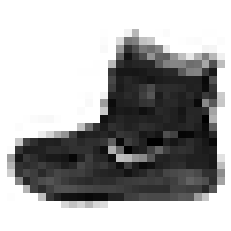

In [6]:
plt.imshow(X_train_full[0], cmap='binary')
plt.axis("off")
print(f'This is a {class_names[y_train_full[0]]}')
plt.show()

This is a T-shirt/top


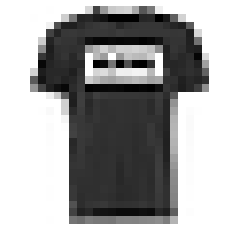

In [7]:
plt.imshow(X_train_full[1], cmap='binary')
plt.axis("off")
print(f'This is a {class_names[y_train_full[1]]}')
plt.show()

This is a T-shirt/top


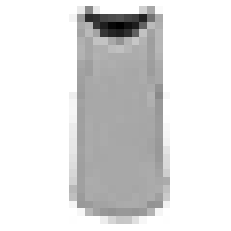

In [8]:
plt.imshow(X_train_full[2], cmap='binary')
plt.axis("off")
print(f'This is a {class_names[y_train_full[2]]}')
plt.show()

This is a Dress


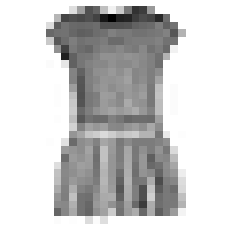

In [9]:
plt.imshow(X_train_full[3], cmap='binary')
plt.axis("off")
print(f'This is a {class_names[y_train_full[3]]}')
plt.show()

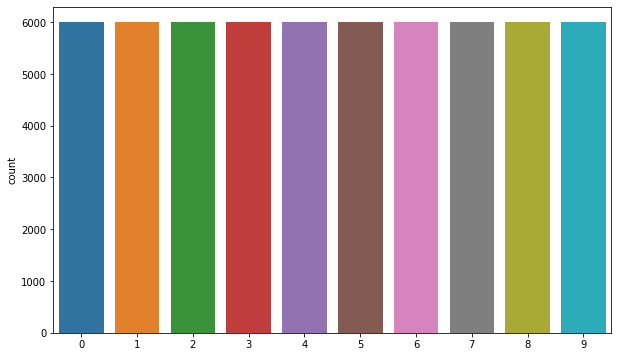

In [10]:
plt.figure(figsize=(10, 6))

sns.countplot(y_train_full)

### Creating a validation set to be able to evaluate the model while the model is training and stop when the model is overfitting.

In [0]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## Creating the model. I used Dropout to block overfitting.

In [0]:
model = Sequential()  # Creating a Sequential object.

model.add(Flatten(input_shape=[28, 28]))  # The input layer will have input_shape=[28, 28] and the activation will be relu.
model.add(Dropout(0.2))  # Using 0.2 Dropout.

model.add(Dense(300, activation='relu'))  # The first hidden layer will have 300 neurons and the activation will be relu.
model.add(Dropout(0.2))  # Using 0.2 Dropout.

model.add(Dense(200, activation='relu'))  # The second hidden layer will have 200 neurons and the activation will be relu.
model.add(Dropout(0.2))  # Using 0.2 Dropout.

model.add(Dense(100, activation='relu'))  # The third hidden layer will have 100 neurons and the activation will be relu.
model.add(Dropout(0.2))  # Using 0.2 Dropout.

model.add(Dense(50, activation='relu'))  # The fourth hidden layer will have 50 neurons and the activation will be relu.
model.add(Dropout(0.2))  # Using 0.2 Dropout.

model.add(Dense(10, activation='softmax'))  # The output layer will have 10 neuron and the activation will be softmax.

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])  # For a multi categorical classification problem.

### Creating an early stopping to stop when the model is overfitting.

In [0]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto',)

## Fitting the model.

In [14]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_valid, y_valid),
          epochs=130, verbose=1, batch_size=32,
          callbacks=[early_stopping])

Epoch 1/130
1719/1719 [==============================] - 4s 3ms/step - loss: 1.1262 - accuracy: 0.5842 - val_loss: 0.6101 - val_accuracy: 0.7720
Epoch 2/130
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7063 - accuracy: 0.7418 - val_loss: 0.5209 - val_accuracy: 0.8120
Epoch 3/130
1719/1719 [==============================] - 4s 3ms/step - loss: 0.6236 - accuracy: 0.7773 - val_loss: 0.4812 - val_accuracy: 0.8246
Epoch 4/130
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5770 - accuracy: 0.7934 - val_loss: 0.4326 - val_accuracy: 0.8440
Epoch 5/130
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5427 - accuracy: 0.8065 - val_loss: 0.4238 - val_accuracy: 0.8516
Epoch 6/130
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5225 - accuracy: 0.8128 - val_loss: 0.4145 - val_accuracy: 0.8490
Epoch 7/130
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5007 - accuracy: 0.8210 - val_loss: 0.3955 - val_ac

## Visualizing the loss for the training and validation sets.

In [0]:
losses = pd.DataFrame(model.history.history)

### That's great. There isn't overfitting, the validation loss is less than the training loss and the accuracy is high.

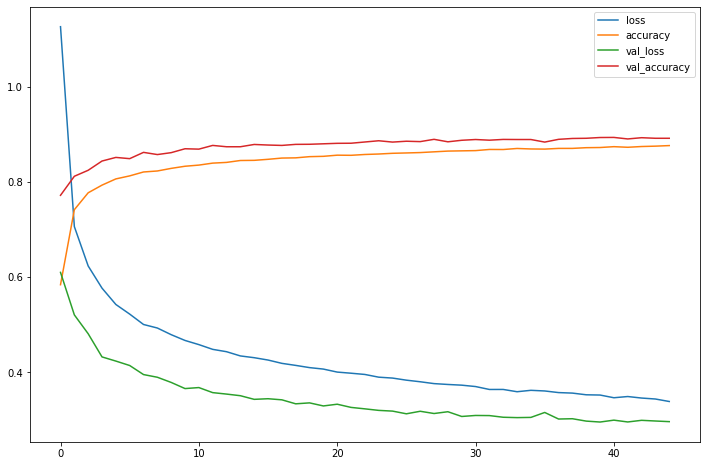

In [16]:
losses.plot(figsize=(12, 8))

## Getting the prediction.

In [17]:
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


## Evaluating the model.
## And we get 84% accuracy.

In [18]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82      1000
           1       0.93      0.98      0.95      1000
           2       0.84      0.64      0.73      1000
           3       0.94      0.80      0.87      1000
           4       0.61      0.95      0.74      1000
           5       0.99      0.89      0.94      1000
           6       0.85      0.40      0.54      1000
           7       0.96      0.80      0.87      1000
           8       0.92      0.98      0.95      1000
           9       0.78      0.99      0.87      1000

    accuracy                           0.84     10000
   macro avg       0.86      0.84      0.83     10000
weighted avg       0.86      0.84      0.83     10000

